In [45]:
import pandas as pd 
import numpy as np 
import geopandas as gpd 

import os 
import matplotlib.pyplot as plt

In [13]:
land_use = pd.read_csv('land_use.csv', index_col = 'TAZ')
tazs = gpd.read_file('../tmp/taz_sfbay.shp')

In [22]:
tazs['zone_id'] = tazs['zone_id'].astype(int)
tazs.sort_values('zone_id')

,objectid,zone_id,district,county,gacres,Shape__Are,Shape__Len,geometry
338,339,1,1,San Francisco,32.530647,0.000008,0.012199,"POLYGON ((-122.39970 37.79223, -122.39990 37.7..."
415,416,2,1,San Francisco,49.911128,0.000013,0.014764,"POLYGON ((-122.39970 37.79223, -122.39950 37.7..."
339,340,3,1,San Francisco,23.589885,0.000006,0.010129,"POLYGON ((-122.40699 37.79032, -122.40710 37.7..."
416,417,4,1,San Francisco,30.883590,0.000008,0.013215,"POLYGON ((-122.40360 37.78943, -122.40370 37.7..."
340,341,5,1,San Francisco,84.606743,0.000022,0.019409,"POLYGON ((-122.40840 37.78833, -122.40850 37.7..."
...,...,...,...,...,...,...,...,...
1037,1038,1450,34,Marin,3564.505472,0.000919,0.201884,"POLYGON ((-122.51825 37.88020, -122.51720 37.8..."
1038,1039,1451,34,Marin,1572.514038,0.000405,0.178458,"POLYGON ((-122.56660 37.90483, -122.56680 37.9..."
1036,1037,1452,34,Marin,1746.060818,0.000450,0.152636,"POLYGON ((-122.54930 37.91113, -122.54810 37.9..."
934,935,1453,34,Marin,22961.995001,0.005919,0.658644,"POLYGON ((-122.62700 37.88573, -122.62588 37.8..."


In [29]:
dense_30 = land_use['employment_density'].sort_values(ascending = False).head(30).index
dense_50 = land_use['employment_density'].sort_values(ascending = False).head(50).index

In [68]:
replace_dict = {False: 'Other            ', True:'Car Free Zone'}
land_use['dense_30'] = land_use.index.isin(dense_30)
land_use['dense_50'] = land_use.index.isin(dense_50)

land_use['dense_30'] = land_use['dense_30'].replace(replace_dict)
land_use['dense_50'] = land_use['dense_50'].replace(replace_dict)

In [69]:
# land_use[['employment_density', 'dense_30', 'dense_50']].sort_values(by = 'employment_density',ascending = False).head(60)

In [70]:
merged = tazs.merge(land_use[['dense_30', 'dense_50']], how = 'left', left_on = 'zone_id', right_index = True)

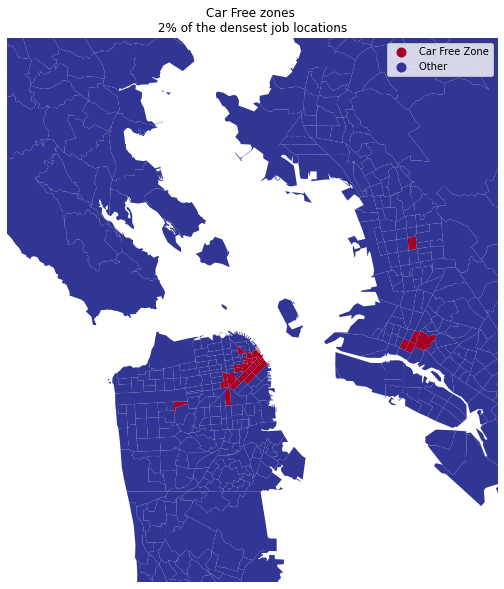

In [88]:
ax = merged.plot(column = 'dense_30', 
                 figsize = (10,10), 
                 categorical = True, 
                 legend = True, 
                 cmap = 'RdYlBu')
plt.xlim((-122.6, -122.2))
plt.ylim((37.65, 38))
ax.set_axis_off()
ax.set_title('Car Free zones \n 2% of the densest job locations ');


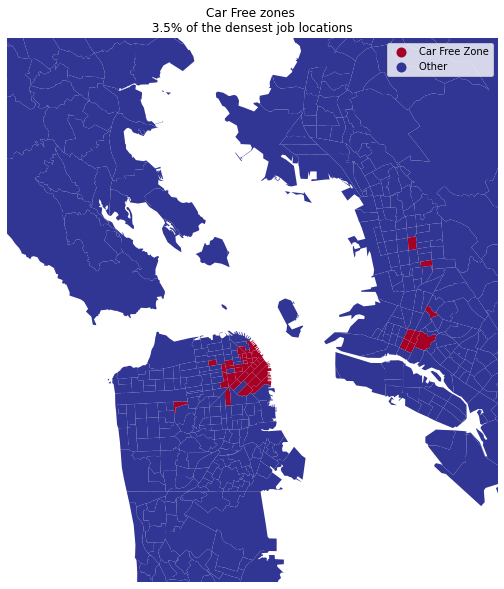

In [89]:
ax = merged.plot(column = 'dense_50', 
                 figsize = (10,10), 
                 categorical = True, 
                 legend = True, 
                 cmap = 'RdYlBu')
plt.xlim((-122.6, -122.2))
plt.ylim((37.65, 38))
ax.set_axis_off()
ax.set_title('Car Free zones \n 3.5% of the densest job locations ');